# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib as plt

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(1))

age   workclass education_level  education-num  marital-status  \
0   39   State-gov       Bachelors           13.0   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male        2174.0           0.0   

   hours-per-week  native-country income  
0            40.0   United-States  <=50K

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

### Check for missing data
To check for missing data we need to see if any rows are missing:

In [2]:
print(data.describe())
print('Total number of rows for income = {}\n'.format(data['income'].shape[0]))
if (data.isnull().values.any()) == False:
    print('No missing data')

                age  education-num  capital-gain  capital-loss  hours-per-week
count  45222.000000   45222.000000  45222.000000  45222.000000    45222.000000
mean      38.547941      10.118460   1101.430344     88.595418       40.938017
std       13.217870       2.552881   7506.430084    404.956092       12.007508
min       17.000000       1.000000      0.000000      0.000000        1.000000
25%       28.000000       9.000000      0.000000      0.000000       40.000000
50%       37.000000      10.000000      0.000000      0.000000       40.000000
75%       47.000000      13.000000      0.000000      0.000000       45.000000
max       90.000000      16.000000  99999.000000   4356.000000       99.000000
Total number of rows for income = 45222

No missing data


In [3]:
from collections import Counter
income_values = pd.Series(data['income'].str.replace('[\[\]\']','').str.split(',').map(Counter).sum())
print(income_values)

<=50K    34014
>50K     11208
dtype: int64


In [4]:
# TODO: Total number of records
n_records = income_values.sum()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = income_values[1]

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = income_values[0]

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = 100 * (n_greater_50k/n_records)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

In [5]:
import warnings
warnings.filterwarnings("ignore")

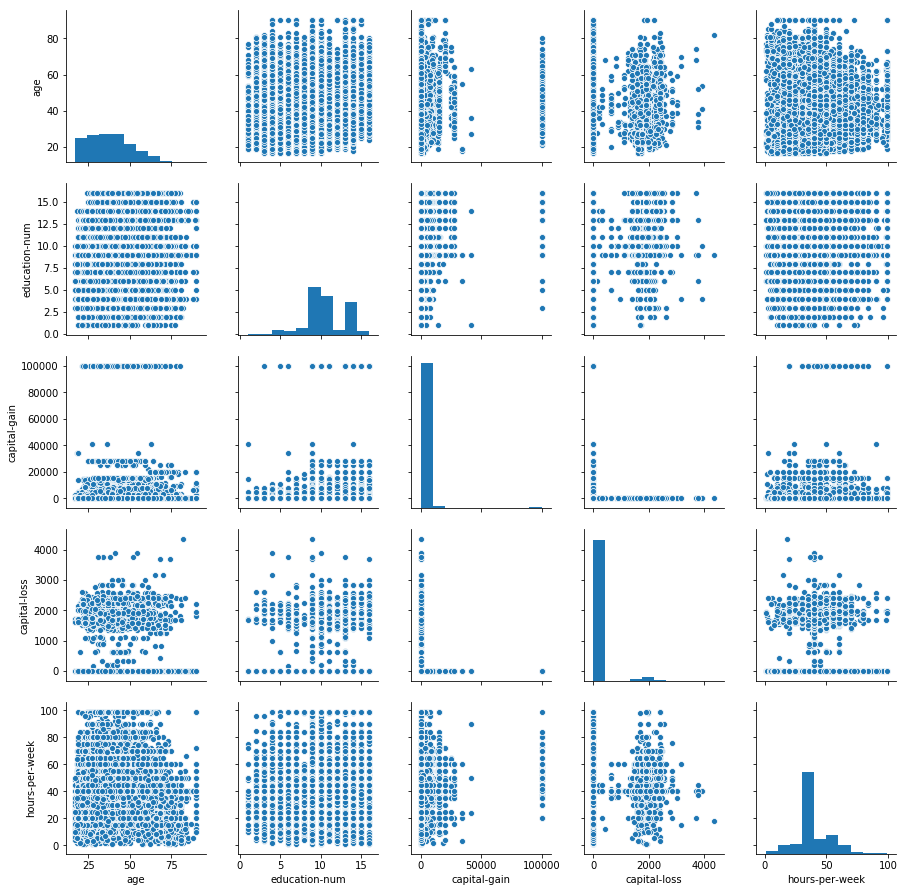

In [6]:
sns.pairplot(data, diag_kind='hist')

Using seaborn distplot we can use rug=True to see where the values lie. We can then adjust the y axis and the number of bins to get a better view.

(0, 1500)

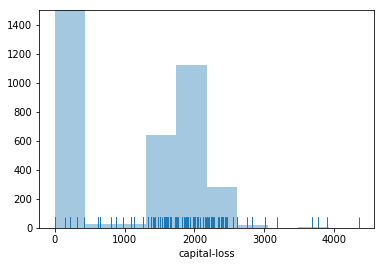

In [7]:
hist0 = sns.distplot(data['capital-loss'], kde=False, rug=True, bins=10)
axes0 = hist0.axes
axes0.set_ylim(0,1500)

(0, 1000)

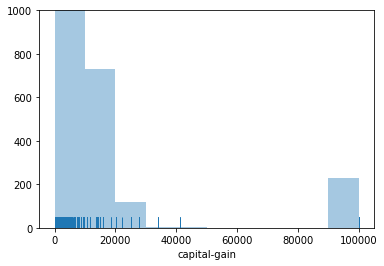

In [8]:
hist1 = sns.distplot(data['capital-gain'], kde=False, rug=True, bins=10)
axes1 = hist1.axes
axes1.set_ylim(0,1000)

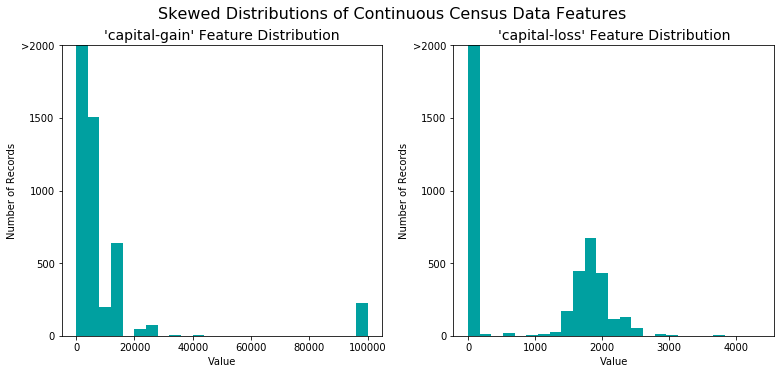

In [9]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

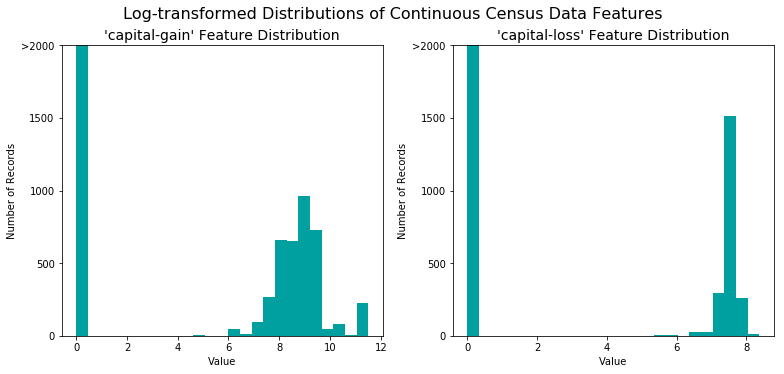

In [10]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

(0, 1500)

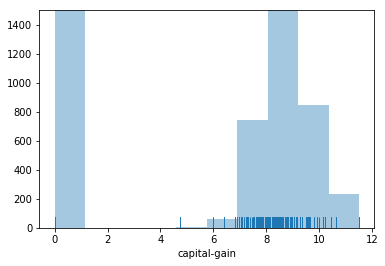

In [11]:
hist2 = sns.distplot(features_log_transformed['capital-gain'], kde=False, rug=True, bins=10)
axes2 = hist2.axes
axes2.set_ylim(0,1500)

(0, 1500)

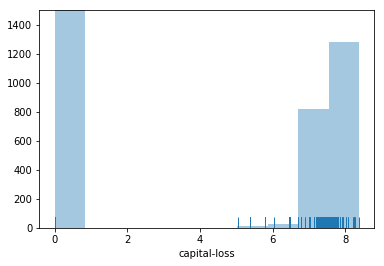

In [12]:
hist3 = sns.distplot(features_log_transformed['capital-loss'], kde=False, rug=True, bins=10)
axes3 = hist3.axes
axes3.set_ylim(0,1500)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [13]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

age          workclass education_level  education-num  \
0  0.301370          State-gov       Bachelors       0.800000   
1  0.452055   Self-emp-not-inc       Bachelors       0.800000   
2  0.287671            Private         HS-grad       0.533333   
3  0.493151            Private            11th       0.400000   
4  0.150685            Private       Bachelors       0.800000   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  
0      0.667492           0.0        0.397959   United-States  
1      0.000000           0.0        0.122449   United-States  
2      0.000000           0.0        0.397959   United-States  
3      0.000000           0.0        0.397959   United-States  
4      0.000000           0.0        0.397959            Cuba

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [14]:
# non_numeric_features = features_log_minmax_transform.drop(numerical, axis=1)
features_log_minmax_transform.sample(frac=1).head(5)

age     workclass education_level  education-num  \
22625  0.479452       Private    Some-college       0.600000   
40382  0.315068   Federal-gov       Bachelors       0.800000   
10195  0.424658     Local-gov    Some-college       0.600000   
3225   0.123288       Private         HS-grad       0.533333   
31195  0.219178       Private       Bachelors       0.800000   

            marital-status        occupation    relationship    race      sex  \
22625   Married-civ-spouse      Craft-repair         Husband   White     Male   
40382   Married-civ-spouse      Adm-clerical         Husband   White     Male   
10195   Married-civ-spouse   Exec-managerial         Husband   White     Male   
3225         Never-married      Adm-clerical       Own-child   White   Female   
31195        Never-married    Prof-specialty   Not-in-family   White   Female   

       capital-gain  capital-loss  hours-per-week  native-country  
22625           0.0      0.000000        0.397959   United-States  
40382           0.0      0.905759        0.397959   United-States  
10195           0.0      0.000000        0.397959   United-States  
3225            0.0      0.000000        0.397959   United-States  
31195           0.0      0.000000        0.397959          Canada

In [15]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
income_raw.iloc[::-1][income_raw.iloc[::-1] == '<=50K'] = 0
income_raw.iloc[::-1][income_raw.iloc[::-1] == '>50K'] = 1

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.\n".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(f'Encoded feature names are:\n{encoded}\n')
print(f'The income col now looks like:\n{income_raw.sample(frac=1).head(5)}')

103 total features after one-hot encoding.

Encoded feature names are:
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-stat

Convert income raw to dtype of int32

In [16]:
income_raw = pd.Series(income_raw, dtype='int32')
income_raw.head(3)

0    0
1    0
2    0
Name: income, dtype: int32

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

Correcting a few things here:
sklearn v0.21.2 uses model_selection for train_test_split

'income_raw' is our data - not 'income'

In [17]:
features_final.sample(frac=1).head(5)

age  education-num  capital-gain  capital-loss  hours-per-week  \
27005  0.493151       0.266667           0.0           0.0        0.397959   
6482   0.369863       0.800000           0.0           0.0        0.397959   
16984  0.465753       0.400000           0.0           0.0        0.448980   
25450  0.287671       0.600000           0.0           0.0        0.244898   
666    0.452055       0.533333           0.0           0.0        0.418367   

       workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
27005                       0                     0                   1   
6482                        0                     0                   1   
16984                       0                     0                   0   
25450                       0                     0                   1   
666                         0                     1                   0   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
27005                        0                            0  ...   
6482                         0                            0  ...   
16984                        0                            1  ...   
25450                        0                            0  ...   
666                          0                            0  ...   

       native-country_ Portugal  native-country_ Puerto-Rico  \
27005                         0                            0   
6482                          0                            0   
16984                         0                            0   
25450                         0                            0   
666                           0                            0   

       native-country_ Scotland  native-country_ South  \
27005                         0                      0   
6482                          0                      0   
16984                         0                      0   
25450                         0                      0   
666                           0                      0   

       native-country_ Taiwan  native-country_ Thailand  \
27005                       0                         0   
6482                        0                         0   
16984                       0                         0   
25450                       0                         0   
666                         0                         0   

       native-country_ Trinadad&Tobago  native-country_ United-States  \
27005                                0                              1   
6482                                 0                              1   
16984                                0                              1   
25450                                0                              1   
666                                  0                              1   

       native-country_ Vietnam  native-country_ Yugoslavia  
27005                        0                           0  
6482                         0                           0  
16984                        0                           0  
25450                        0                           0  
666                          0                           0  

[5 rows x 103 columns]

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income_raw, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [19]:
TP = np.sum(income_raw)
FP = income_raw.count() - TP
TN = 0
FN = 0

In [20]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN) / (FP + FN + TP + TN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + (0.5) ** 2) * ((precision * recall) / (((0.5) ** 2 * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

# Naive Bayes (Gaussian)

## Applications
Naive Bayes has many applications in the real-world. It is very popular in the Medical industry - which itself is a huge area and has many applications where it can be applied.

From my own research in my MSc, I used the results of [1]. Here Naive Bayes was used to categorically identify phage virion proteins from features such as amino acid composition and nucleo-capsid thickness. My own research was motivated in trying to understand the numerical mathematical dynamics of these features. The classifier had excellent results in this case - and this raised further questions about the dynamics of the features of viral proteins over time which were (and still) largely unknown. **This was an excellent use case of machine learning** to identify viral proteins from seemingly healthy ones - but mathematically was interesting as current numerical methods were slow, and the dyanmics of the equations were unknown. The classifier can be used to save a lot of time practically but mathematically raised more questions about what was happening to the current numerical models used. 
The model also has extensive usage in text classification (such as the Spam example used in this nano-degree), and can also be used for predicting and recommendations if someone or something will do something (assuming the features are largely independent).

## Advantages
The model performs very well in problems where the features are largely conditionally independent from each other. This means that we are assuming that features do not depend on each other (E.g if we considered height and weight we would exepct them to correlate, taller people would weigh more than shorter people, but weight could still be conditionally independent as there are other factors to consider in how heavy someone is).
Because of this this means that the model will converge much quicker than other methods (such as linear regression) - in practice this means we can use less training data. We can use the model for both discrete and continuous data. [2]

## Disadvatanges
The model also has disadvantages. When the featurees are dependent the conditional independence does not hold: in such a case computing

$P(X|C_i)$

can be computationally expensive if we cannot leverage the conditional probability condition

$P(X|C_i) = P(x_1 | C_i) * P(x_2 | C_i) * ... * P(x_N | C_i)$

Interestingly, it has been shown that Naive Bayes (Gaussian) can be used and will even perform well even when this independence assumption does not hold. [3] accredits this to the underlying zero-loss function used in the algorithm - which calculates the error as the number of incorrect predictions. The zero-loss function does not penalise inaccurate probability estimates as long as the highest probability is assigned to the correct class [4]. In addition - special care must be taken if using this model **for non indpendent features** in the continuous case - as the model minimises the expected loss by maximising the posterior probability $P(C_i|X)$. Care must be taken when considering the zero-loss function, as integrating a discrete indicator over a probability density function (for a continuous case) would always be zero. Functions such as the Dirac delta function can be applied in this case [5]. There is much more research into why this model performs well when this condition does not hold and can be seen in [6].
Although the model is a very good classifier - it does fall short on estimating. This means we can use the model to evaluate future people given their features - but the probability that someone belongs to either class is not a good indicator. This means that future modelling will require all our data to classify someone, using the probabilities that someone belongs in either class is not a practical use for this model.



## Reasoning
Based on the above I believe this model is a good candidate.
* We have features that appear at face value to not closely depend on each other - by this I mean no features stand out as largely dependending on another. Age is largeley independent to Ethnicity. Although there could be some dependence on the Capital Gains or Loss with respect to the other features - further investigation would only be warrented in my opinion if the output of the model warrants it.
* We want to know categorically if someone earns above or below \$50k

# Decision Trees

## Applications

Decision trees have many applications in industry:
* One example is in customer relations and reccomendations. Decision trees can be used to analyse how customers interact online and then analyse their usage to provide recomendations based on this information. [10] applied decision trees to investigate customers shopping habits online - by classing people into two categories, 1) Those who rarely used it and 2) Those who shopped online frequently. The result of the decision tree showed that the time it takes customers to complete a transaction and how urgently the item needed were the most important factors in whether a customer shopped online or not. 

## Advantages

Decision trees have many advantages when being considered as a classifier

* They perform well with missing data points. Other methods require the removal of data if any features are missing - which is inefficient and if not careful can affect the validity of your data. Decision trees work around this by classifying missing values as a seperate category - where other categories can be used to analyise the missing categories. Or you can build a decision tree to categorically predict the missing values based on the data as a preliminary step before using the model to obtain your results. [7]
* They have excellent use in determining whether or not features are relatively important to one another. By using a decision tree you can find how important a feature is by removing it from the tree and validating the result against the feature included. This is a popular method employed to finding importance of features - I myself have used such methods when considering the importance of states in Markov Chains. By removing a state one by one - you can find the relative importance of a state relative to the other states. This can tell you lots of information about how important each state is. [8]
* Unlike a Naive Bayes classifier, Decision Trees can be used to predict values. The resulting probabilites from the model can be used to predict whether or not someone will belong to a class without the need to run the model with the new data included each time. [7]
* They are excellent when using categorical data. If you have a category that has many values under it a decision tree is a very good model in deciding how these categories can be split or grouped together. They can break the category down into a more manageable group. We can see in the cell below that the Occuption column has 14 values present. A decision tree can handle this (and much higher counts) with ease. [7]

## Disadvantages
* Although decision trees are excellent predictors - if the data changes or evolves over time (say the number of people belonging to a specific job goes up) then the model needs to be redrawn to account for this. This can be accounted for by using ensemble methods in tandem with a decision tree [9]
* The hyperparamters for the model are very important - popular hyperparamters to consider are max_depth which can be used to control over-fitting, min_samples_split and min_samples_leaf which consider how many samples are needed to split or be defined as a leaf and min_weight_fraction_leaf when considering weighted samples. The overabundance and consideration of the hyperparameters means there is a need to understand your data before considering values for these. Methods we have seen such as grid search can aid in the process when we have many to consider.
* Decision trees are sensitive if a category is dominated by a particular value. Careful consideration should be taken if this is the case and balancing the data can help. Methods used to balance could include resampling (adding copies of under respresented values) or under sampling (removal of some of the dominant class values. We should also pay close attention to the Precision, Recall and F1 Score when evaluating the model - as this can aid in selection. 

## Reasoning
Based on the above I believe Decision Trees are a good candidate for our problem.
* We have a single classification problem which lends itself well to decision trees. 
* We have categories which contain many classes (such as occupation) - we know decision trees can be used to great affect with this kind of data.
* Easy to visulise and explain - justifying the model can be easily done with scikitlearn. We can plot the tree which will show us the categories and their values used to split at each node.
* Categorical data - although we have accounted for categories with pd.get_dummies(), the model lends itself well to categorical data.

In [21]:
import collections
occupation_cat_count = collections.Counter(data['occupation'].unique())
occupation_cat_count = sum(occupation_cat_count.values())
print(f'Number of unique values in occupation column is {occupation_cat_count}')
# sum(collections.Counter(encoded).values())

Number of unique values in occupation column is 14


# SVMs

## Applications

An application of a support vector machine in industry is:
* SVMs have a wide application in image recognition and classification problems. When applied to image recognition each feature of the data set corresponds to a single image pixel. An SVM can be used to classify these pixels into which category they belong to based on their features (such as edge, colour or shape). In [11] SVMs were used on microscopic images of cells to detect the location of the cell nucleus. Manual location of the cell nuclei is a long and arduous process especially when considering there may be many of thousands of images to consider. A SVM can be used to learn what part of on image corresponds to a nucleus, and what part does not and was used to great effect in this case - managing to locate the neclei across multiple scales and stains successfully. Their usage is not limited to the medical sector and have many practical uses such as in geography in identifying areas of land suitable for cultivation and farming [12]

## Advantages

SVMs have many advantages and are a powerful classification method
* They integerate well with kernel methods - this means that SVMs are very versatile. You can employ different Kernels when considering how you will map your points to a higher dimensional space and even write your own kernels if your data requires it.
* When compared to linear regression methods SVMs are more robust due to the maximising of the margin. With the hyperparamter C you can control how much an incorrectly classified point is penalised.
* They are excellent at non linear boundaries due to the kernels they employ. Although it is possible to employ kernels in other methods such as regression SVMs in scikitlearn have the kernels already implemented and it is much easier to use the "kernel trick" (the kernel trick using the fact that you can generalise kernels in higher dimensions by using the dot product in the original space and using a generalisation of the corresponding Kernel. [14] has an excellent write up on how this used for the Linear kernel) 

## Disadvantages
Although SVMs are powerful in classification problems there are disadvantages we must consider when using them
* Choosing a kernel function is not an easy task and can often be the main barrier to the success of the model. Although scikitlearn offers several kernals such as the linear kernel and the popular Radial Basis Function kernel or RBF. The RBF is often used and uses the squared euclidean distance between two points. The feature space of the kernel has an infinite number of dimensions [13] and this means the kernel can be used to project points any higher dimension - although this comes at a huge computational cost. 
* The model has a long training time on large data sets and this is due to several reasons
    * The C parameter is a hyperparameter used to penalise misclassified points - the higher this is, the more accurate the results but the slower the training process is.
    * The general method is of $O(n^3)$ (where $O$ is big Oh notation) - meaning it has to run a number of operations proportional to $n^3$. With 10,000 data points this means the number of operations is proportional to $10^{12}$ - a huge number which can affect our computational time greatly.
    
## Reasoning
Based on the above I believe SVMs can be used for our model
* We have a classification problem which is well suited to SVMs.
* They are very good when we have a large number of features and after transforming our category values into feature values we know we have 98 features for our category data.
* With careful selection of our C hyperparamter and a suitable kernel we can obtain good boundaries for our dataset.

# References
[1] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3671239/

[2] https://www.slideshare.net/ashrafmath/naive-bayes-15644818

[3] https://www.cs.waikato.ac.nz/~eibe/pubs/nbr.pdf

[4] https://link.springer.com/article/10.1023/A:1009778005914

[5] https://en.wikipedia.org/wiki/Dirac_delta_function

[6] https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf

[7] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4466856/

[8] https://www.analyticsvidhya.com/blog/2018/01/channel-attribution-modeling-using-markov-chains-in-r/

[9] https://scikit-learn.org/stable/modules/tree.html

[10] https://www.sciencedirect.com/science/article/pii/S0957417406001825

[11] https://link.springer.com/article/10.1007/s00138-010-0275-y

[12] https://www.ncbi.nlm.nih.gov/pubmed/20052093

[13] https://en.wikipedia.org/wiki/Radial_basis_function_kernel

[14] https://www.quora.com/What-is-the-kernel-trick|

**Answer: **

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [22]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    beta = 0.5
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [23]:
y_train.head(5)

13181    0
10342    0
20881    0
24972    1
43867    0
Name: income, dtype: int32

36177 3617 361

0 361
GaussianNB trained on 361 samples.
1 3617
GaussianNB trained on 3617 samples.
2 36177
GaussianNB trained on 36177 samples.
0 361
DecisionTreeClassifier trained on 361 samples.
1 3617
DecisionTreeClassifier trained on 3617 samples.
2 36177
DecisionTreeClassifier trained on 36177 samples.
0 361
SVC trained on 361 samples.
1 3617
SVC trained on 3617 samples.
2 36177
SVC trained on 36177 samples.


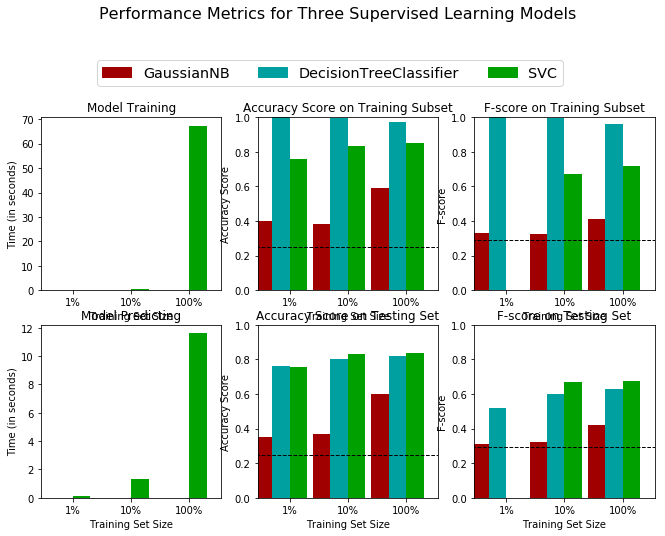

In [24]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = DecisionTreeClassifier()
clf_C = SVC()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = int(X_train.shape[0])
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)
print(samples_100, samples_10, samples_1)
print()
# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        print(i, samples)
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

From the above graphs we can see that when working on our training data (which is a subset of the entire dataset used exlusively for training our model) that the Decision Tree classifier appears to be overfitting. We can see this because the accuracy and F-score are very very close to one for all 3 splits of our data. This most likely suggests our model is overfitting and it will not generalise well when we introduce the rest of the data to try predict the result. 

Looking at a Support vector machine in the above graphs we can see that for the testing data (and the training data) that this model appears to show some promise. Accuracy for the SVM on 100% of the data appears to be around 80% with the default values. For the fscore we can see that the value is around 65-70% for 100% of the data. This is a good indicator that with some further tuning of the model - we should be able to increase this accuracy further.

The training time for a SVM is the highest out of all of the 3 models chosen. Indeed with 100% of the data used only SVM is showing any significant time needed to train a model. This is something we will have to work with and be careful with. If the model takes a significant amount of time to train we could look to the other two models. If we chose a decision tree we would need to be careful that we do not overfit and put some work into tuning the hyperparameters for the model. 

We discuss below the algorithms suitability and how it works in simple terms as to the reason why we are choosing a SVM.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

A support vector machine is a supervised learning algorithm that can be used in regression, but it really shines when used as a classifier. As we are wanting to classify whether someone earns \$50k or not we have a classification problem, which a support vector machine lends itself well to.


The model works by classifying points. If we had 2 features (i.e if we took age and education level), converted them to arbitrary numbers and plotted them on a grid, we could colour each point red or green: red being they earn <50k and green meaning they earn >50k. In this plot a support vector machine would attempt to find a "line" that seperates the data.

In our case we have many features (much more than 2), in this case visualising a plot is impossible, but the method remains the same just extended to higher dimensions. In this case we are not finding a line, rather a hyperplane (a higher dimensional line) that will seperate the points.

When finding a hyperplane the model uses a margin to help optimise the model. We can think of the margin as the distance from a point to the seperating line (or hyperplane). If this margin is high, then this means there is a good distance from each classified point to the seperating hyperplane. If this margin is small, this means the points are close to the hyperplane - this means we are more likely to make a mistake in classifying a point. The aim of the method is to find the best line. It knows what the best is by maxmising this distance margin. 

A support vector machine uses a technique called the kernel trick to find this hyperplane. What this means in practice is that we can find very non linear hyperplanes to seperate our data. When compared to methods such as regression which do something similar, it means a support vector machine is much more useful in a non-linear seperation problem. If we observed our data in the 2 dimensional example as above, it might be obvious from the graph that a circle might seperate our data and classify points accurately. A SVM would allow us to do this, a regression line would not. 

To make a prediction the model will take a data point we give it, and "plot" it. It would then read from this what it believes the point is (what region it has been plotted in) based on the data we gave the model to train using the found hyperplane. This is how it makes a prediction

** All information here is taken from this Udacity course - I have not cited it as per https://udacity.zendesk.com/hc/en-us/articles/360001451091-What-is-plagiarism-

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

clf = SVC(C=0.01, gamma=0.1, kernel='rbf')

clf.fit(X_train, y_train)



SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
predictions_test = clf.predict(X_test)

In [27]:
accuracy_score(y_test, predictions_test)

0.8245439469320066

In [28]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Initialize the classifier
clf = SVC()

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 30],
              'gamma': [0.001, 0.01, 0.1, 1, 2, 5],
              'kernel': ['linear', 'rbf']}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer, n_jobs=-1)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8371
F-score on testing data: 0.6745

Optimized Model
------
Final accuracy score on the testing data: 0.8392
Final F-score on the testing data: 0.6803


In [29]:
best_clf

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [33]:
grid_obj.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 30], 'gamma': [0.001, 0.01, 0.1, 1, 2, 5], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(fbeta_score, beta=0.5), verbose=0)>

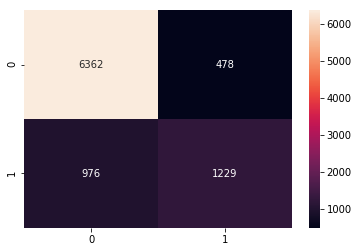

In [42]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test, best_predictions)

sns.heatmap(cf, annot=True, fmt='d')

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8371         |    0.8392       |
| F-score        |    0.6745         |    0.6803       |


**Answer: **

The results are better (only marginally). I ran this several times with the same parameters and it remains very close whether a rbf or linear kernel was chosen.


The scores for the naive model were: Accuracy score: 0.2478, F-score: 0.2917

If this were a production use case - I would do further investigation with the hyperparamters. Rather than using a step of 0.001, 0.01, 0.1 for C I would look at more granular steps in between these values. For values of C < 1 this usually suggests we have noisy data.

We could also look at gamma - we have a relatively small value of gamma at 0.001. If this is too small then the model may not be able to accurately capture the shape of the data.

If I were to work on this further - I would try a grid search with more granular values for gamma and C. I would then make use of the seaborn heatmap to see the validation accuracy on a scale of 0 to 1 to see the heatmap for each combination of values.

That being said we have a much higher accuracy when compared to the naive predictor and this is to be expected. Since our assumption was naive and we have used a model with tuned parameters.

We see that our accuracy of our tuned model is 0.8392 compared to 0.2478 of the naive model. This is an increase of ~240% which is a huge improvement. 

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

In [48]:
data.head(5)

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States      0  
1           0.0            13.0   United-States      0  
2           0.0            40.0   United-States      0  
3           0.0            40.0   United-States      0  
4           0.0            40.0            Cuba      0

**Answer:**

I would rank the features in the following order

1. Hours per week - I would consider this very important. Those who do not work full time (>35 hours a week) are much less likely to have a high income. It is noteworthy that if their marital status is married then this could explain why someone works few hours a week. As our data is income individually (and not household income) I would therefore rate this as the highest indicator.

2. Capital gain - I would consider this important. Those who have investments that are paying off I would believe to have a high enough income to begin with to afford the investment. 

3. Education Level - Those who have a Bachelors degree or higher are more likely to be earning more than those who do not (see https://smartasset.com/retirement/the-average-salary-by-education-level)

4. Native Country - I would expect that this would be quite important in determining whether someone earns over \$50k. Countries such as the UK, USA and Luxembourg would have a higher median income compared to countries such as Liberia and other African states.

5. Sex - On average women earn 78 cents to the dollar when compared to men (according to CNN in 2015 in the USA https://money.cnn.com/2015/04/13/news/economy/equal-pay-day-2015/). Although there are many reasons why this is the case in terms of looking just at the data and the problem we want to solve, I would expect more men than women to earn $50k or above.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

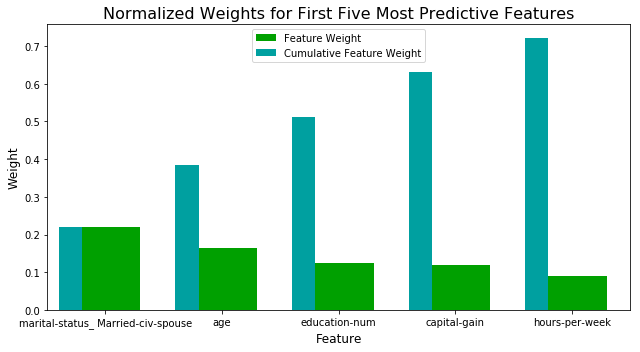

In [51]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.tree import DecisionTreeClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?



**Answer:**

Features that are the same:
1. Capital Gain
2. Hours per Week

Features that differ:
1. Marital Status
2. Age
3. Education Number

We can see that the five most important features from the graph account for nearly 70% of the feature weight. This means that these features account for 70% of the variability in determining our answer. 

Age is one feature I would have included instead of Sex - it makes sense that the older one is, the more money they would be earning. I can see why this is second in terms of importance when considering the data and the problem we are trying to answer.

I am somewhat surprised to see that someone who is married to be number one in terms of importance. It is plausible that those who are married are able to earn more if we considered household income. 

Education Number is a metric I am not familiar with being from the UK - I am guessing that this is closely related to Education Level (e.g in a few cells up we see the first 5 rows of our data and everyone who has a Bachelors degree has an education number of 13). If this is the case then my suspicion that the level to which one is educated is an important factor in considering their income level.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [57]:
# Import functionality for cloning a model
from sklearn.base import clone
import time 

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

start_time = time.time()
# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
end_time = time.time()


# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)



print(f'Time took to fit: {end_time - start_time:.2f}s')
# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Time took to fit: 5.49s
Final Model trained on full data
------
Accuracy on testing data: 0.8392
F-score on testing data: 0.6803

Final Model trained on reduced data
------
Accuracy on testing data: 0.8226
F-score on testing data: 0.6420


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

The final model using the reduced features is very close to the result if we trained on the whole dataset. The accuracy decreases by 2% and the f-score decreases by 5.6%. **It took a mere 5.5 seconds to fit the data to the whole dataset.** Such a small trade off in accuracy for such a huge increase in time savings is something I would most certainly consider if training time was a factor.

Indeed when using grid search I initially tried a much more granular approach to find the C and gamma values for the SVM. I initially tried a logspace of 14 numbers (np.logspace(-12, 3, num=14)) but even on powerful hardware (an intel i9 9900k with 32GB RAM) this hadn't completed after 72 hours continuously running. This was most likely due to the very small precise values of gamma and C oweing to much longer training times needed. Working with a much smaller feature set would be interesting to see if we can find more precise values in a much smaller time.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.